## Imports

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from coclust.clustering import SphericalKmeans
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
X, y = make_blobs(n_samples=1000, n_features=11, centers=4, random_state=2)

In [3]:
X.shape

(1000, 11)

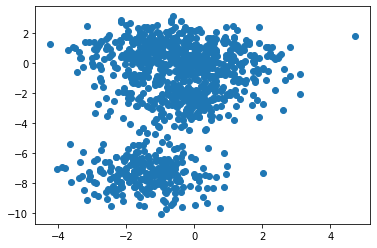

In [5]:
plt.scatter(X[:, 0], X[:, 2])

## Kmeans

In [6]:
k = KMeans(n_clusters=4, max_iter=100, random_state=69)

In [7]:
k.fit(X)

KMeans(max_iter=100, n_clusters=4, random_state=69)

In [8]:
np.count_nonzero((k.predict(X) == y) == True) / len(y)

0.25

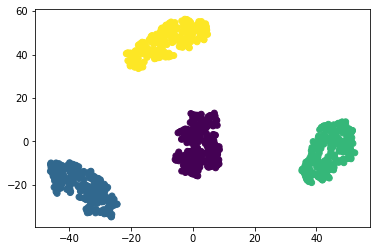

In [9]:
X_em = TSNE(n_components=2).fit_transform(k.transform(X))
plt.scatter(X_em[:, 0], X_em[:, 1], c=k.predict(X))

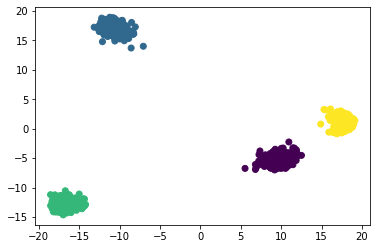

In [10]:
X_gm = PCA(n_components=2).fit_transform(k.transform(X))
plt.scatter(X_gm[:, 0], X_gm[:, 1], c=k.predict(X))

## SphericalKmeans

In [11]:
s = SphericalKmeans(n_clusters=4, max_iter=100, random_state=69, weighting=True)

In [12]:
s.fit(X)

 == New init == 
iteration: 0
608.2550533838042
iteration: 1
900.4134546898862
iteration: 2
939.6889312641603
iteration: 3
942.6096521785471
iteration: 4


In [13]:
np.count_nonzero((s.labels_ == y) == True) / len(y)

0.5

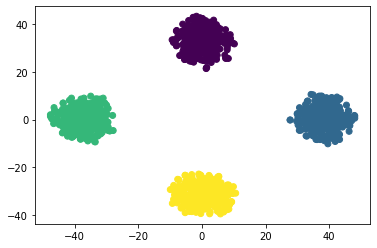

In [15]:
X_em = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_em[:, 0], X_em[:, 1], c=k.predict(X))

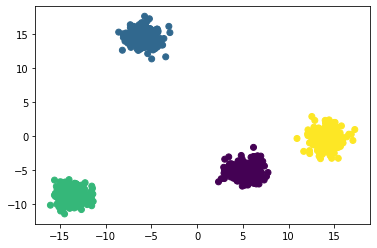

In [16]:
X_gm = PCA(n_components=2).fit_transform(X)
plt.scatter(X_gm[:, 0], X_gm[:, 1], c=k.predict(X))